In [2]:
import pandas as pd
df = pd.read_csv('bai2_air-quality-data.csv')

1.	Đọc dữ liệu và xem xét các cột có giá trị thiếu (NaN), tính toán tỷ lệ phần trăm dữ liệu bị thiếu cho mỗi cột.

In [3]:
num_nan_rows = (df.isna().sum() / len(df)) * 100
print(num_nan_rows)


Datetime    0.000000
PM2.5       0.000000
PM10        0.000000
NO2         0.010495
NH3         0.000000
SO2         0.000000
CO          0.000000
O3          0.000000
NOx         0.000000
NO          0.000000
Benzene     0.000000
Toluene     0.000000
Xylene      0.000000
dtype: float64


2.	Xử lý các giá trị bị thiếu trong dữ liệu. Bạn có thể chọn cách điền giá trị trung bình của cột hoặc loại bỏ hàng có dữ liệu bị thiếu.

In [17]:
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

3.	Tạo biểu đồ cột (bar chart) để hiển thị tỷ lệ phần trăm dữ liệu bị thiếu của từng cột.

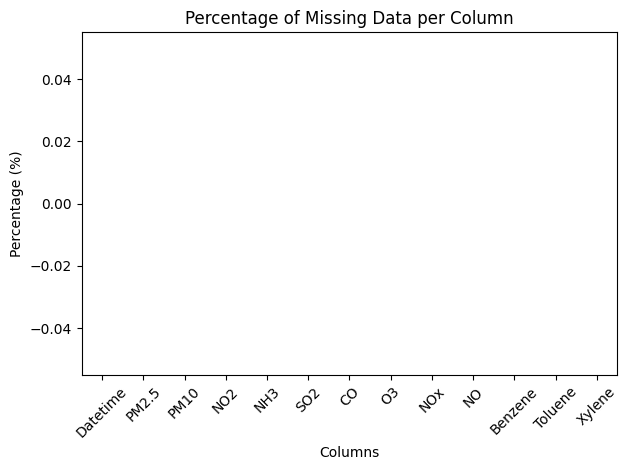

In [27]:
import matplotlib.pyplot as plt

num_nan_rows.plot(kind='bar', color='Blue', edgecolor='white')
plt.title('Percentage of Missing Data per Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4.	Tìm những khoảng thời gian mà chỉ số PM2.5 vượt quá ngưỡng 100 (chỉ số chất lượng không khí rất xấu). 

In [13]:
pm25_exceed_100 = df[df['PM2.5'] > 100]
print("Time Periods Where PM2.5 Exceeds 100:")
print(pm25_exceed_100[['Datetime', 'PM2.5']].shape[0])

Time Periods Where PM2.5 Exceeds 100:
2768


In [16]:
be_100 = df[df['PM2.5'] < 100]
print(be_100[['Datetime', 'PM2.5']].shape[0])

6759


In [14]:
df.shape[0]

9528

5.	Tạo biểu đồ đường (line chart) hiển thị sự thay đổi của PM2.5 theo thời gian, và làm nổi bật những thời điểm vượt quá ngưỡng 100.

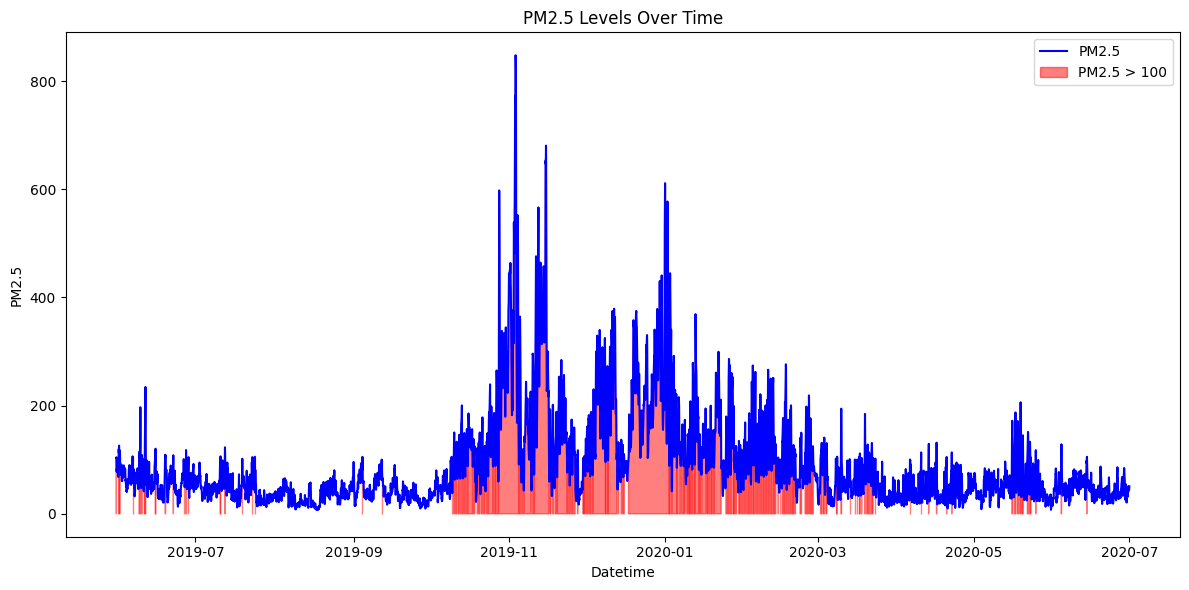

In [25]:
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

df_cleaned = df.dropna(subset=['Datetime', 'PM2.5'])

plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Datetime'], df_cleaned['PM2.5'], label='PM2.5', color='blue')
plt.fill_between(df_cleaned['Datetime'], df_cleaned['PM2.5'], where=(df_cleaned['PM2.5'] > 100), color='red', alpha=0.5, label='PM2.5 > 100')
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Datetime')
plt.ylabel('PM2.5')
plt.legend()
plt.tight_layout()
plt.show()

6.	Tạo cột mới tính số năm làm việc của mỗi nhân viên (dựa vào Start Date và ngày hiện tại).

In [28]:
df_cleaned['Above_100'] = df_cleaned['PM2.5'] > 100
df_cleaned['Group'] = (df_cleaned['Above_100'] != df_cleaned['Above_100'].shift()).cumsum()
above_100_groups = df_cleaned[df_cleaned['Above_100']].groupby('Group').size()
longest_period = above_100_groups.max()
print("Longest period with PM2.5 > 100 (in hours):", longest_period)

Longest period with PM2.5 > 100 (in hours): 383


7.	Tạo một cột mới là "ngày" từ cột Datetime để phân tích theo từng ngày.

In [29]:
df_cleaned['day'] = df_cleaned['Datetime'].dt.date

8.	Tính chỉ số trung bình của các chất ô nhiễm chính (PM2.5, PM10, NO2) theo từng ngày.

In [30]:
daily_avg = df_cleaned.groupby('day')[['PM2.5', 'PM10', 'NO2']].mean()
print("Daily Average of Pollutants:")
print(daily_avg.head())

Daily Average of Pollutants:
                PM2.5        PM10        NO2
day                                         
2019-05-31  88.574583  337.771250  56.833333
2019-06-01  95.397917  298.348750  57.237500
2019-06-02  73.361667  219.787917  32.222083
2019-06-03  66.938333  300.702083  30.355546
2019-06-04  54.952083  171.582500  36.004583


9.	Tạo biểu đồ đường (line chart) để hiển thị xu hướng biến động của PM2.5 theo ngày trong toàn bộ khoảng thời gian.

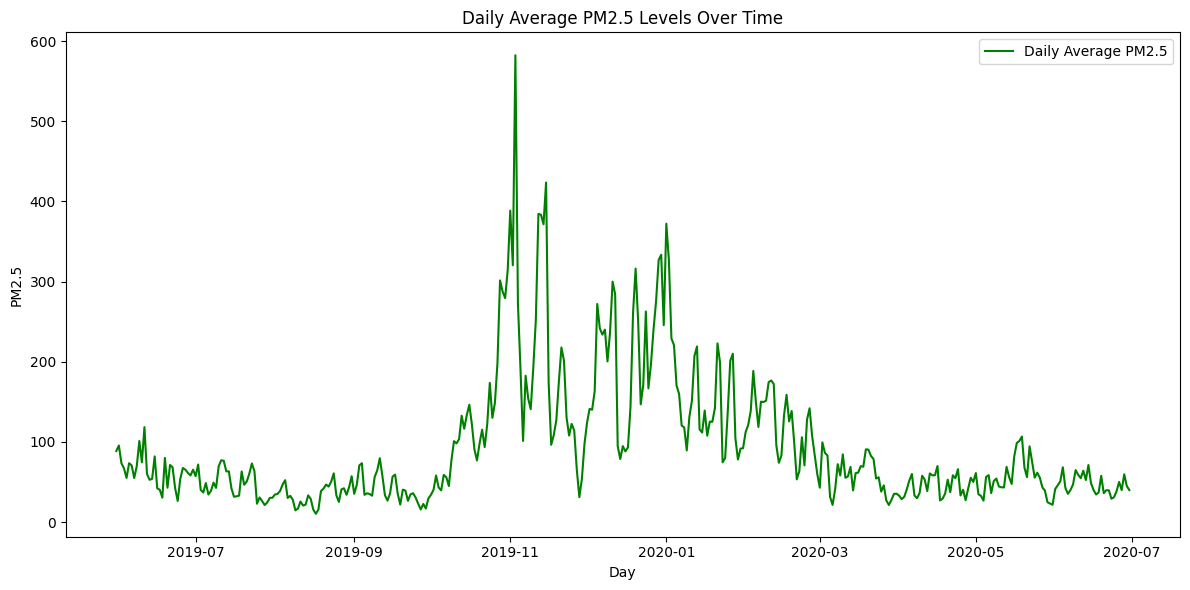

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(daily_avg.index, daily_avg['PM2.5'], color='green', label='Daily Average PM2.5')
plt.title('Daily Average PM2.5 Levels Over Time')
plt.xlabel('Day')
plt.ylabel('PM2.5')
plt.legend()
plt.tight_layout()
plt.show()


10.	Tạo một cột mới từ Datetime đại diện cho "ngày trong tuần" (Thứ 2, Thứ 3, v.v.).

In [33]:
df_cleaned['day_of_week'] = df_cleaned['Datetime'].dt.day_name()

df_cleaned

,Datetime,PM2.5,PM10,NO2,NH3,SO2,CO,O3,NOx,NO,Benzene,Toluene,Xylene,Above_100,Group,day,day_of_week
0,2019-05-31 00:00:00,103.26,305.46,94.71,31.43,30.16,3.00,18.06,178.31,152.73,13.65,83.47,2.54,True,1,2019-05-31,Friday
1,2019-05-31 01:00:00,104.47,309.14,74.66,34.08,27.02,1.69,18.65,106.50,79.98,11.35,76.79,2.91,True,1,2019-05-31,Friday
2,2019-05-31 02:00:00,90.00,314.02,48.11,32.60,18.12,0.83,28.27,48.45,25.27,5.66,32.91,1.59,False,2,2019-05-31,Friday
3,2019-05-31 03:00:00,78.01,356.14,45.45,30.21,16.78,0.79,27.47,44.22,21.50,3.60,21.41,0.78,False,2,2019-05-31,Friday
4,2019-05-31 04:00:00,80.19,372.90,45.23,28.68,16.41,0.76,26.92,44.06,22.15,4.50,23.39,0.62,False,2,2019-05-31,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9523,2020-06-30 19:00:00,44.05,120.06,21.16,31.21,10.92,0.90,50.22,17.17,6.58,1.58,20.39,0.54,False,324,2020-06-30,Tuesday
9524,2020-06-30 20:00:00,43.19,123.26,22.28,29.92,10.64,0.92,44.13,17.66,6.33,1.63,17.83,0.86,False,324,2020-06-30,Tuesday
9525,2020-06-30 21:00:00,45.30,125.22,22.91,29.95,10.59,1.04,39.62,17.96,6.34,1.72,18.06,1.16,False,324,2020-06-30,Tuesday
9526,2020-06-30 22:00:00,49.04,129.39,20.95,30.01,10.20,1.00,38.95,16.80,6.29,1.66,16.17,1.18,False,324,2020-06-30,Tuesday


11.	Tính trung bình của các chất ô nhiễm theo từng ngày trong tuần.

In [34]:
avg_by_weekday = df_cleaned.groupby('day_of_week')[['PM2.5', 'PM10', 'NO2']].mean()
print("Average Pollutants by Day of the Week:")
print(avg_by_weekday)

Average Pollutants by Day of the Week:
                 PM2.5        PM10        NO2
day_of_week                                  
Friday       91.039598  180.191623  37.802325
Monday       93.234327  176.898421  37.050872
Saturday     84.088845  169.597368  36.933268
Sunday       92.800651  174.712076  34.818670
Thursday     94.324323  185.923891  38.867686
Tuesday      95.112814  183.088523  38.174635
Wednesday    96.893646  188.887009  39.561198


12.	Xác định ngày nào trong tuần có mức độ ô nhiễm cao nhất.

In [35]:
highest_pollution_day = avg_by_weekday['PM2.5'].idxmax()
print("Day of the Week with the Highest PM2.5 Level:", highest_pollution_day)


Day of the Week with the Highest PM2.5 Level: Wednesday
